### I. Not onehot encoding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("D:\\CC\\Basic\\Softmax\\iris_full.csv", delimiter=",", skip_header=True)

In [3]:
x = data[:, :-1]
y = data[:, -1].astype(int)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
n_sample, n_feature = x.shape

In [5]:
def add_cot_1(x):
    return np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

In [6]:
x = add_cot_1(x)

In [10]:
# params
w = np.random.rand(n_feature + 1, len(set(y)))
n_iter = 1000
lr = 0.01
bs = n_sample
losses = []

In [ ]:
# find w
for _ in range(1):
    for i in range(0, n_sample, bs):
        
        # pick sample
        xi = x[i:i+bs, :]
        yi = y[i:i+bs]
        
        # Forward
        z = xi @ w
        exp_z = np.exp(z)
        yp = (exp_z/np.sum(exp_z, axis=1, keepdims=True))
        
        # Get loss
        loss = (-np.log(yp[range(len(yi)), yi])).mean()
        losses.append(loss)
        
        # Backward 
        dz = yp.copy()
        dz[range(len(yi)), yi] -= 1
        dw = (xi.T @ dz)/bs

        # Update w
        w -= lr*dw

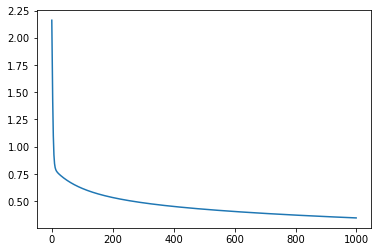

In [9]:
plt.plot(losses)

In [11]:
# test
z = x @ w
exp_z = np.exp(z)
yp = (exp_z/np.sum(exp_z, axis=1, keepdims=True))

In [12]:
#accuracy
(yp.argmax(axis=1) == y).mean() 

0.9733333333333334

### II. Onehot encoding

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = np.genfromtxt("iris_full.csv", delimiter=",", skip_header=True)

In [14]:
x = data[:, :-1]
y = data[:, -1].astype(int)

In [15]:
n_sample, n_feature = x.shape

In [16]:
n_output = len(set(y))

In [17]:
def one_hot(y):
    y_onehot = np.zeros(shape = (len(y), len(set(y))), dtype=np.uint8)
    y_onehot[range(len(y)), y] = 1
    return y_onehot

In [18]:
y = one_hot(y)

In [19]:
def add_cot_1(x):
    return np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

In [20]:
x = add_cot_1(x)

In [25]:
x.shape, y.shape

((150, 5), (150, 3))

In [21]:
# params
w = np.random.rand(n_feature + 1, n_output)
n_iter = 1000
lr = 0.01
bs = 50
losses = []

In [24]:
w.shape

(5, 3)

In [ ]:
# Tìm w
for _ in range(1):
    for i in range(0, n_sample, n_sample):
        
        # pick sample
        xi = x[i:i+bs, :]
        yi = y[i:i+bs, :]
        
        # Forward
        z = xi @ w
        exp_z = np.exp(z)
        yp = (exp_z/np.sum(exp_z, axis=1, keepdims=True)) # 150x3

        # Get loss
        loss = (-np.sum(yi*np.log(yp))).mean()
        losses.append(loss)

        # Backward (tính đạo hàm)
        dw = (xi.T @ (yp - yi))/bs

        # Update w
        w -= lr*dw

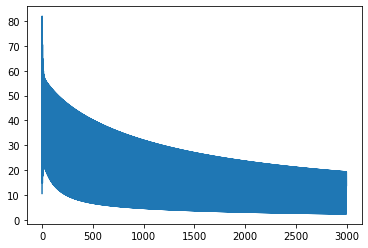

In [24]:
plt.plot(losses)

In [26]:
# test
z = x @ w
exp_z = np.exp(z)
yp = (exp_z/np.sum(exp_z, axis=1, keepdims=True))

In [27]:
#accuracy
(yp.argmax(axis=1) == y.argmax(axis=1)).mean()

0.9733333333333334